<a href="https://colab.research.google.com/github/hashir5/EcodeCamp_Internship_TASK_3/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [01:02<00:00, 18.2MB/s]
100% 1.06G/1.06G [01:02<00:00, 18.2MB/s]


In [3]:
# Unzip the Dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# Inport all the required Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
# Creating the Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 100,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 100,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize the Data
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [8]:
# Crete the Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Check the Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
# Run the Model
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 64s 238ms/step - accuracy: 0.5975 - loss: 0.7012 - val_accuracy: 0.7440 - val_loss: 0.5156
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 210ms/step - accuracy: 0.7574 - loss: 0.4967 - val_accuracy: 0.8004 - val_loss: 0.4277
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.8140 - loss: 0.4008 - val_accuracy: 0.8002 - val_loss: 0.4348
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.8669 - loss: 0.3121 - val_accuracy: 0.8030 - val_loss: 0.4575
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 86s 230ms/step - accuracy: 0.9114 - loss: 0.2145 - val_accuracy: 0.8064 - val_loss: 0.5039
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.9519 - loss: 0.1260 - val_accuracy: 0.8114 - val_loss: 0.6306
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.9723 - loss: 0.0764 - val_accuracy: 0.8080 - val_loss: 0.8044
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 86s 226ms/step - accuracy: 0.9829 - loss: 0

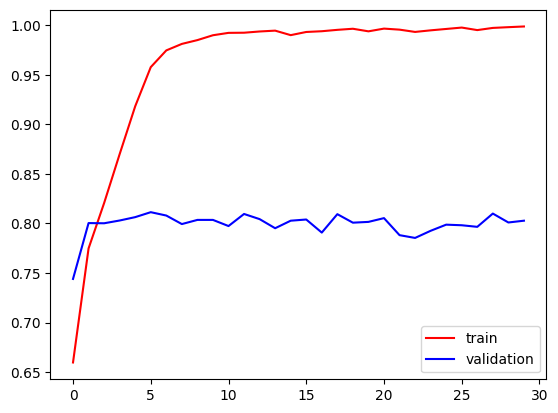

In [12]:
# Draw the Grap of Model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


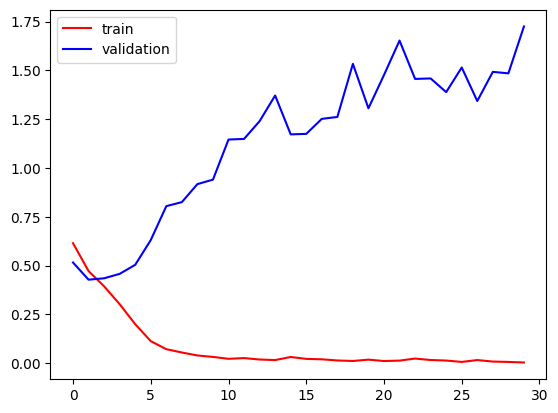

In [13]:
# Plot the training loss and validation loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [14]:
# Predicting the result
import cv2

In [29]:
# Read the image to check result
test_img1 = cv2.imread('/content/cat.jpeg')


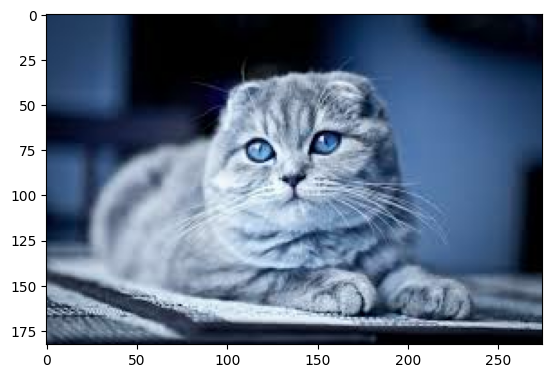

In [30]:
# plot the image
plt.imshow(test_img1)

In [31]:
test_img1.shape

(183, 275, 3)

In [32]:
# shape the image
test_img1 = cv2.resize(test_img1,(256,256))


In [33]:
# create the image and convert into 4D
test_input1 = test_img1.reshape(1,256,256,3)

In [34]:
# output should be zero it indicatetes the cat
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

In [35]:
test_img2 = cv2.imread('/content/dog.jpeg')


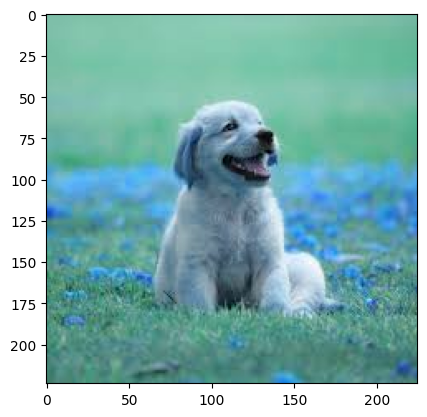

In [36]:
# plot the image
plt.imshow(test_img2)

In [37]:
test_img2.shape

(224, 225, 3)

In [38]:
# shape the image
test_img2 = cv2.resize(test_img2,(256,256))


In [39]:
# create the image and convert into 4D
test_input2 = test_img2.reshape(1,256,256,3)

In [40]:
# output should be zero it indicatetes the cat
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.]], dtype=float32)